In [22]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def compute_rejection(num_seeds, option, n=200, p=20, delta=0.0, is_oc=False, is_naive=False):
    # proposed and oc
    results = []
    for seed in range(num_seeds):
        with open(f'results_{option}/{n}_{p}_{delta}_{seed}.pkl', 'rb') as f:
            results += pickle.load(f)
    assert len(results) == num_seeds * 1000, (option, n, p, delta, len(results))
    p_list = np.array([result.p_value for result in results])
    si = np.mean(p_list < 0.05)

    naive = None
    if is_naive:
        stats = [result.stat for result in results]
        naive = np.mean(np.abs(stats) > norm.ppf(0.975))

    # oc
    oc = None
    if is_oc:
        results = []
        for seed in range(min(num_seeds, 4)):
            with open(f'results_{option}_oc/{n}_{p}_{delta}_{seed}.pkl', 'rb') as f:
                results += pickle.load(f)
        assert len(results) == min(num_seeds, 4) * 1000, (option, n, p, delta, len(results))
        p_list = np.array([result.p_value for result in results])
        oc = np.mean(p_list < 0.05)

    return si, oc, naive


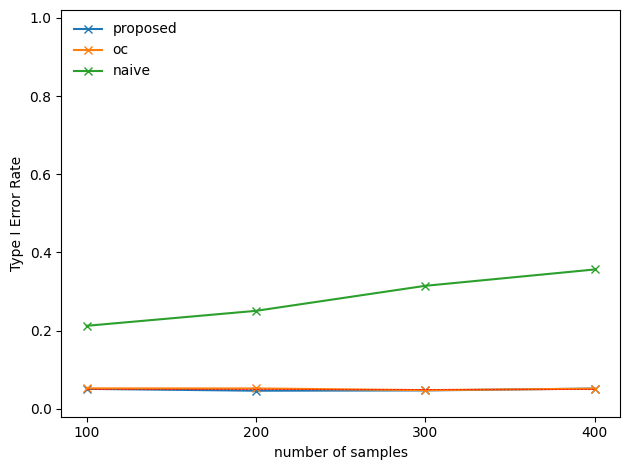

In [32]:
# option 1 type I error rate when changing n, not cv

op1 = []
op1_oc = []
op1_naive = []

for n in (ns := [100, 200, 300, 400]):
    si, oc, naive = compute_rejection(4, 'op1', n=n, is_naive=True, is_oc=True)
    op1.append(si)
    op1_oc.append(oc)
    op1_naive.append(naive)

plt.plot(ns, op1, label='proposed', marker="x")
plt.plot(ns, op1_oc, label='oc', marker="x")
plt.plot(ns, op1_naive, label='naive', marker="x")
plt.plot(ns, 0.05 * np.ones(len(ns)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(ns)
plt.xlabel('number of samples')
plt.ylabel('Type I Error Rate')
plt.legend(frameon=False, loc='upper left')
plt.savefig('figure/fpr_op1_n.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()

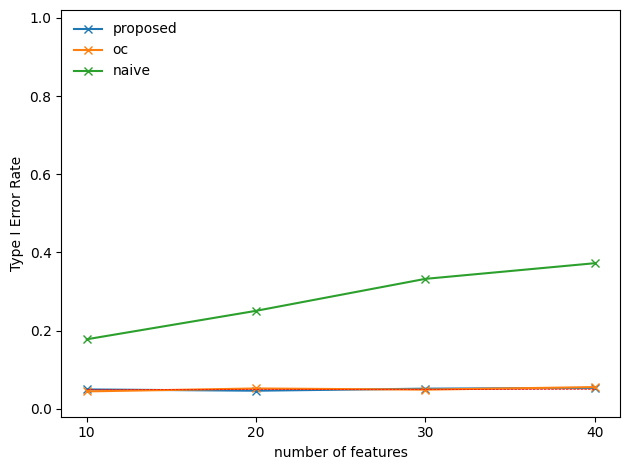

In [33]:
# option 1 type I error rate when changing p, not cv

op1 = []
op1_oc = []
op1_naive = []

for p in (ps := [10, 20, 30, 40]):
    si, oc, naive = compute_rejection(4, 'op1', p=p, is_naive=True, is_oc=True)
    op1.append(si)
    op1_oc.append(oc)
    op1_naive.append(naive)

plt.plot(ps, op1, label='proposed', marker="x")
plt.plot(ps, op1_oc, label='oc', marker="x")
plt.plot(ps, op1_naive, label='naive', marker="x")
plt.plot(ps, 0.05 * np.ones(len(ps)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(ps)
plt.xlabel('number of features')
plt.ylabel('Type I Error Rate')
plt.legend(frameon=False, loc='upper left')
plt.savefig('figure/fpr_op1_p.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()

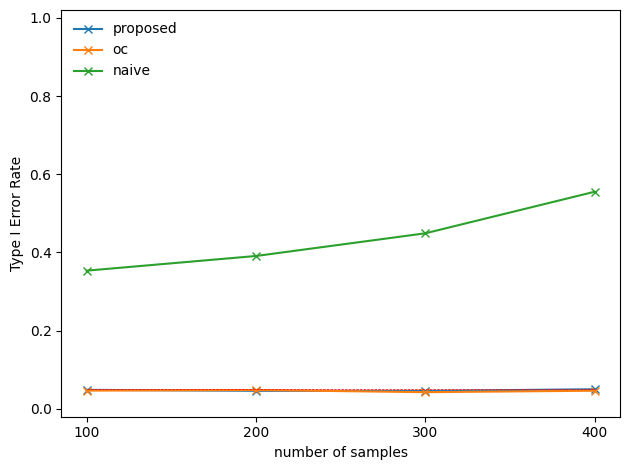

In [34]:
# option 2 type I error rate when changing n, not cv

op2 = []
op2_oc = []
op2_naive = []

for n in (ns := [100, 200, 300, 400]):
    si, oc, naive = compute_rejection(4, 'op2', n=n, is_naive=True, is_oc=True)
    op2.append(si)
    op2_oc.append(oc)
    op2_naive.append(naive)

plt.plot(ns, op2, label='proposed', marker="x")
plt.plot(ns, op2_oc, label='oc', marker="x")
plt.plot(ns, op2_naive, label='naive', marker="x")
plt.plot(ns, 0.05 * np.ones(len(ns)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(ns)
plt.xlabel('number of samples')
plt.ylabel('Type I Error Rate')
plt.legend(frameon=False, loc='upper left')
plt.savefig('figure/fpr_op2_n.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()

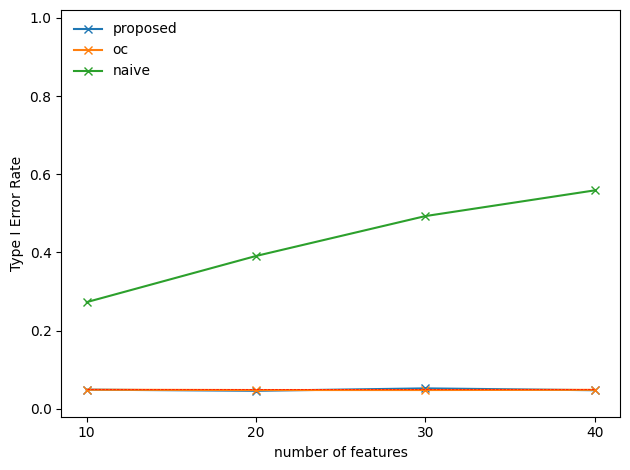

In [35]:
# option 2 type I error rate when changing p, not cv

op2 = []
op2_oc = []
op2_naive = []

for p in (ps := [10, 20, 30, 40]):
    si, oc, naive = compute_rejection(4, 'op2', p=p, is_naive=True, is_oc=True)
    op2.append(si)
    op2_oc.append(oc)
    op2_naive.append(naive)

plt.plot(ps, op2, label='proposed', marker="x")
plt.plot(ps, op2_oc, label='oc', marker="x")
plt.plot(ps, op2_naive, label='naive', marker="x")
plt.plot(ps, 0.05 * np.ones(len(ps)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(ps)
plt.xlabel('number of features')
plt.ylabel('Type I Error Rate')
plt.legend(frameon=False, loc='upper left')
plt.savefig('figure/fpr_op2_p.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()

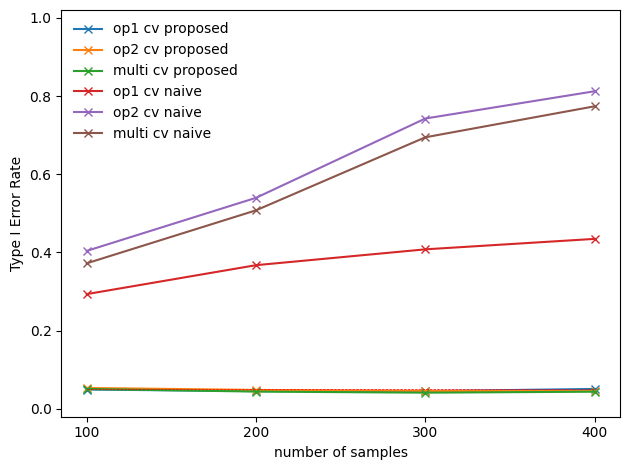

In [36]:
# type I error rate when changing n, cv

op1cv = []
op2cv = []
op12cv = []
op1cv_naive = []
op2cv_naive = []
op12cv_naive = []

for n in (ns := [100, 200, 300, 400]):
    si, _, naive = compute_rejection(4, 'op1cv', n=n, is_naive=True)
    op1cv.append(si)
    op1cv_naive.append(naive)

    si, _, naive = compute_rejection(4, 'op2cv', n=n, is_naive=True)
    op2cv.append(si)
    op2cv_naive.append(naive)

    si, _, naive = compute_rejection(4, 'op12cv', n=n, is_naive=True)
    op12cv.append(si)
    op12cv_naive.append(naive)

plt.plot(ns, op1cv, label='op1 cv proposed', marker="x")
plt.plot(ns, op2cv, label='op2 cv proposed', marker="x")
plt.plot(ns, op12cv, label='multi cv proposed', marker="x")

plt.plot(ns, op1cv_naive, label='op1 cv naive', marker="x")
plt.plot(ns, op2cv_naive, label='op2 cv naive', marker="x")
plt.plot(ns, op12cv_naive, label='multi cv naive', marker="x")

plt.plot(ns, 0.05 * np.ones(len(ns)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(ns)
plt.xlabel('number of samples')
plt.ylabel('Type I Error Rate')
plt.legend(frameon=False, loc='upper left')
plt.savefig('figure/fpr_cv_n.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()

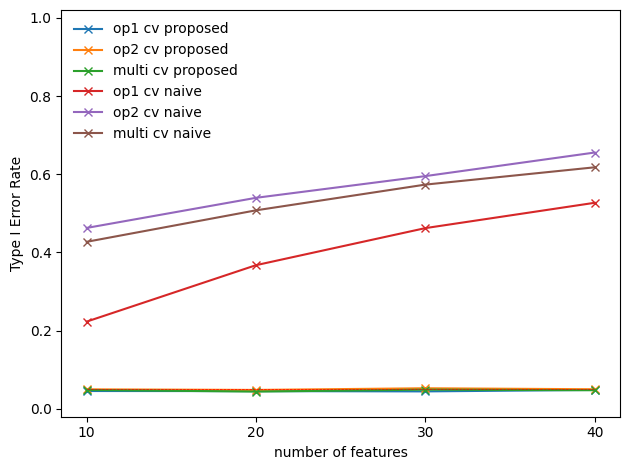

In [37]:
# type I error rate when changing p, cv

op1cv = []
op2cv = []
op12cv = []
op1cv_naive = []
op2cv_naive = []
op12cv_naive = []

for p in (ps := [10, 20, 30, 40]):
    si, _, naive = compute_rejection(4, 'op1cv', p=p, is_naive=True)
    op1cv.append(si)
    op1cv_naive.append(naive)

    si, _, naive = compute_rejection(4, 'op2cv', p=p, is_naive=True)
    op2cv.append(si)
    op2cv_naive.append(naive)

    si, _, naive = compute_rejection(4, 'op12cv', p=p, is_naive=True)
    op12cv.append(si)
    op12cv_naive.append(naive)

plt.plot(ps, op1cv, label='op1 cv proposed', marker="x")
plt.plot(ps, op2cv, label='op2 cv proposed', marker="x")
plt.plot(ps, op12cv, label='multi cv proposed', marker="x")

plt.plot(ps, op1cv_naive, label='op1 cv naive', marker="x")
plt.plot(ps, op2cv_naive, label='op2 cv naive', marker="x")
plt.plot(ps, op12cv_naive, label='multi cv naive', marker="x")

plt.plot(ps, 0.05 * np.ones(len(ps)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(ps)
plt.xlabel('number of features')
plt.ylabel('Type I Error Rate')
plt.legend(frameon=False, loc='upper left')
plt.savefig('figure/fpr_cv_p.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()

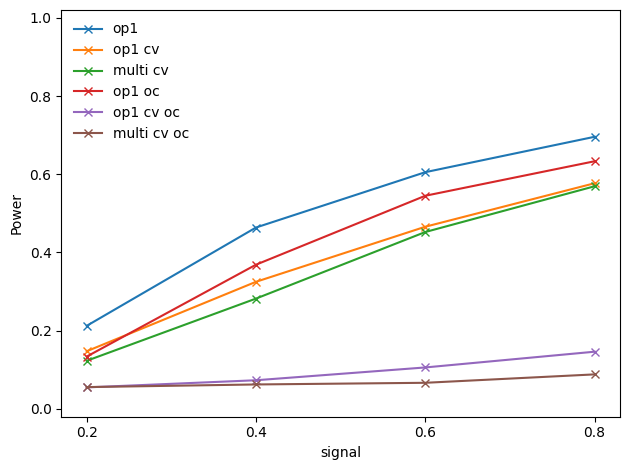

In [39]:
# option 1 power when changing signal, cv

op1 = []
op1cv = []
op12cv = []

op1_oc = []
op1cv_oc = []
op12cv_oc = []

num_seeds = 10

for delta in (deltas := [0.2, 0.4, 0.6, 0.8]):
    si, oc, _ = compute_rejection(num_seeds, 'op1', delta=delta, is_oc=True)
    op1.append(si)
    op1_oc.append(oc)

    si, oc, _ = compute_rejection(num_seeds, 'op1cv', delta=delta, is_oc=True)
    op1cv.append(si)
    op1cv_oc.append(oc)

    si, oc, _ = compute_rejection(num_seeds, 'op12cv', delta=delta, is_oc=True)
    op12cv.append(si)
    op12cv_oc.append(oc)

plt.plot(deltas, op1, label='op1', marker="x")
plt.plot(deltas, op1cv, label='op1 cv', marker="x")
plt.plot(deltas, op12cv, label='multi cv', marker="x")

plt.plot(deltas, op1_oc, label='op1 oc', marker="x")
plt.plot(deltas, op1cv_oc, label='op1 cv oc', marker="x")
plt.plot(deltas, op12cv_oc, label='multi cv oc', marker="x")

plt.ylim(-0.02, 1.02)
plt.xticks(deltas)
plt.xlabel('signal')
plt.ylabel('Power')
plt.legend(frameon=False, loc='upper left')
plt.savefig('figure/tpr_op1.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)

plt.show()

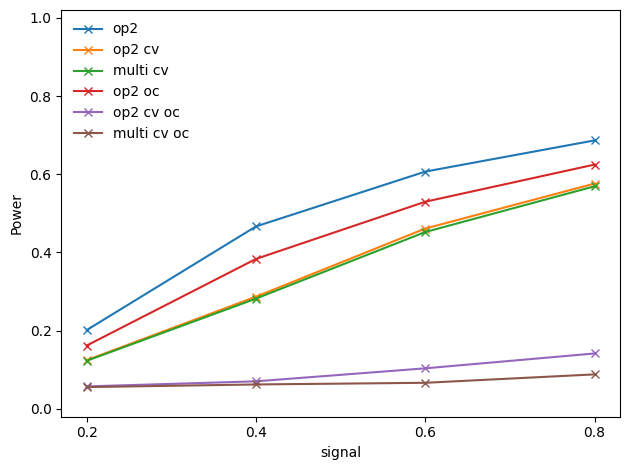

In [40]:
# option 1 power when changing signal, cv

op2 = []
op2cv = []
op12cv = []

op2_oc = []
op2cv_oc = []
op12cv_oc = []

num_seeds = 10

for delta in (deltas := [0.2, 0.4, 0.6, 0.8]):
    si, oc, _ = compute_rejection(num_seeds, 'op2', delta=delta, is_oc=True)
    op2.append(si)
    op2_oc.append(oc)

    si, oc, _ = compute_rejection(num_seeds, 'op2cv', delta=delta, is_oc=True)
    op2cv.append(si)
    op2cv_oc.append(oc)

    si, oc, _ = compute_rejection(num_seeds, 'op12cv', delta=delta, is_oc=True)
    op12cv.append(si)
    op12cv_oc.append(oc)

plt.plot(deltas, op2, label='op2', marker="x")
plt.plot(deltas, op2cv, label='op2 cv', marker="x")
plt.plot(deltas, op12cv, label='multi cv', marker="x")

plt.plot(deltas, op2_oc, label='op2 oc', marker="x")
plt.plot(deltas, op2cv_oc, label='op2 cv oc', marker="x")
plt.plot(deltas, op12cv_oc, label='multi cv oc', marker="x")

plt.ylim(-0.02, 1.02)
plt.xticks(deltas)
plt.xlabel('signal')
plt.ylabel('Power')
plt.legend(frameon=False, loc='upper left')
plt.savefig('figure/tpr_op2.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()